<a href="https://colab.research.google.com/github/SayyedAliT/Artificial-Intelligence-Course-/blob/main/Project2/AI_SayyedAli_Tahami_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> # Part I: Section A



# HierArchical Clustering

Hierarchical clustering is an unsupervised learning algorithm used to group similar objects into clusters. The algorithm builds a hierarchy of clusters by either a divisive method, starting with all observations in a single cluster and dividing them into smaller ones, or an agglomerative method, starting with each observation as a separate cluster and merging them into larger ones.

**`Agglomerative Approach:`** Begins with each data point as an individual cluster and merges them step by step based on similarity until all points are in a single cluster or a stopping criterion is met.

**`Similarity Metrics:`** Uses measures like distance (Euclidean, Manhattan, etc.) to determine the similarity between data points or clusters.


**`Dendrogram Representation:`** Visualizes the process of cluster formation and helps determine the number of clusters by cutting the dendrogram at a desired level.



```
# Key mathematical points:
```







 The key mathematical concept here is the distance between data points. Clusters are formed based on the closeness of data points to one another.



> **Measurement of distance between clusters:**




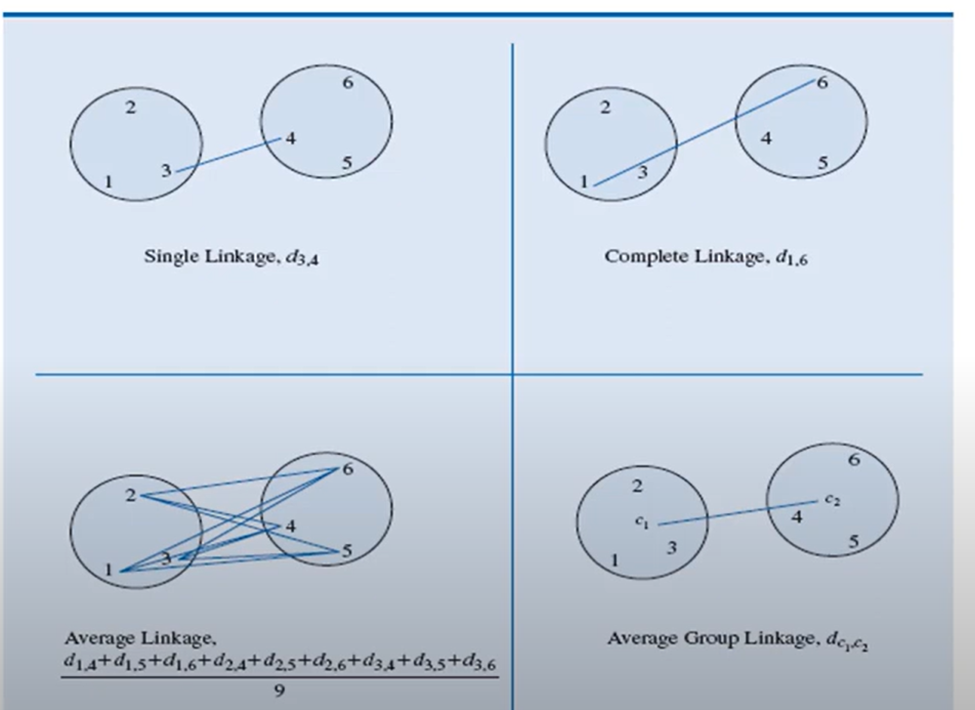



> In Single Linkage,

 the distance between two clusters is the minimum distance between members of the two clusters
> In Complete Linkage,

the distance between two clusters is the maximum distance between members of the two clusters
> In Average Linkage,

 the distance between two clusters is the average of all distances between members of the two clusters
> In Centroid Linkage,

 the distance between two clusters is is the distance between their centroids

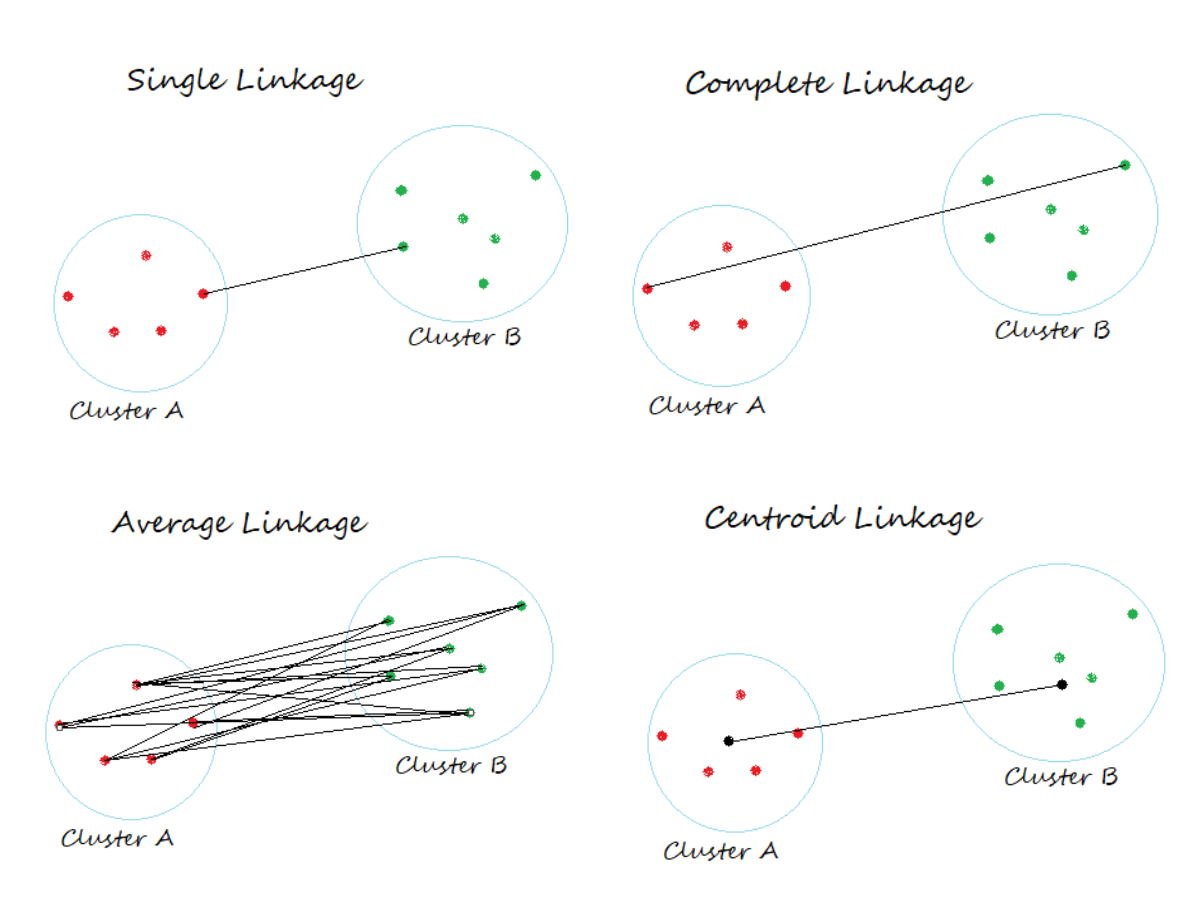

***`Example:`***





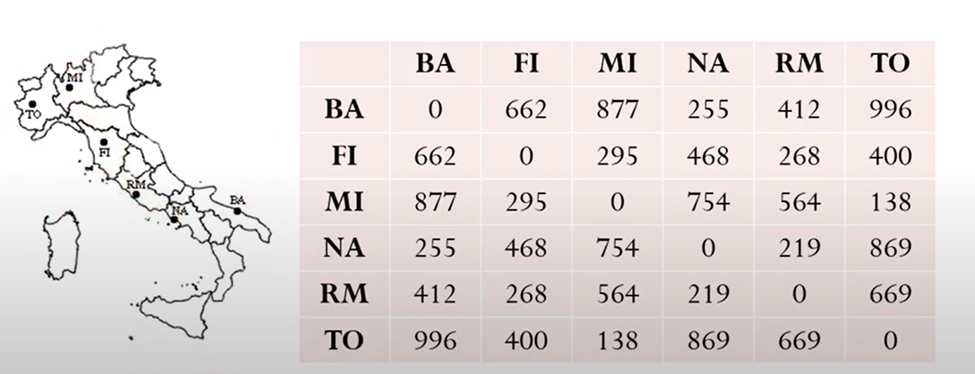

**Finding the min distance:**

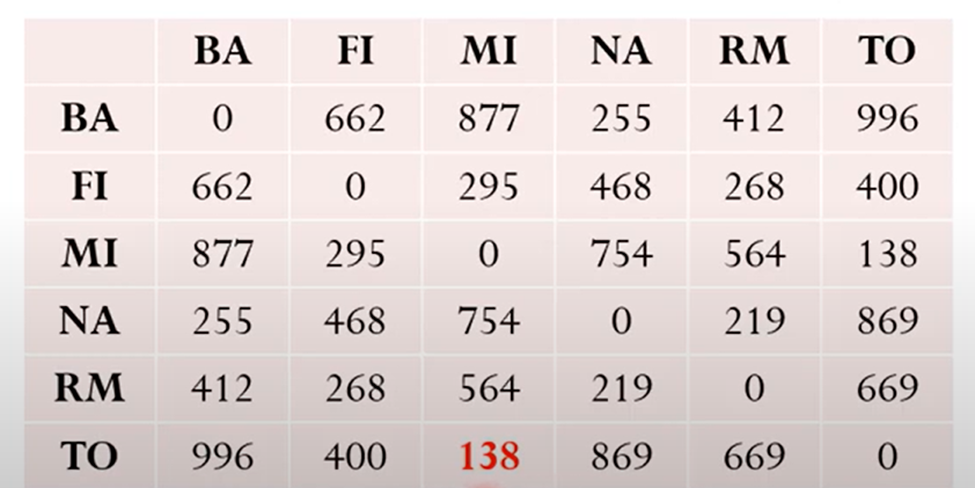

**Updating the matrix**

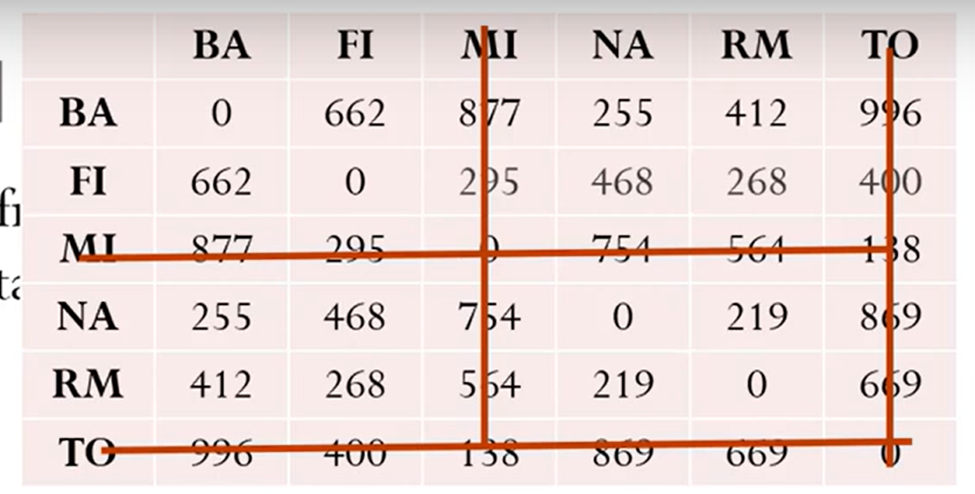

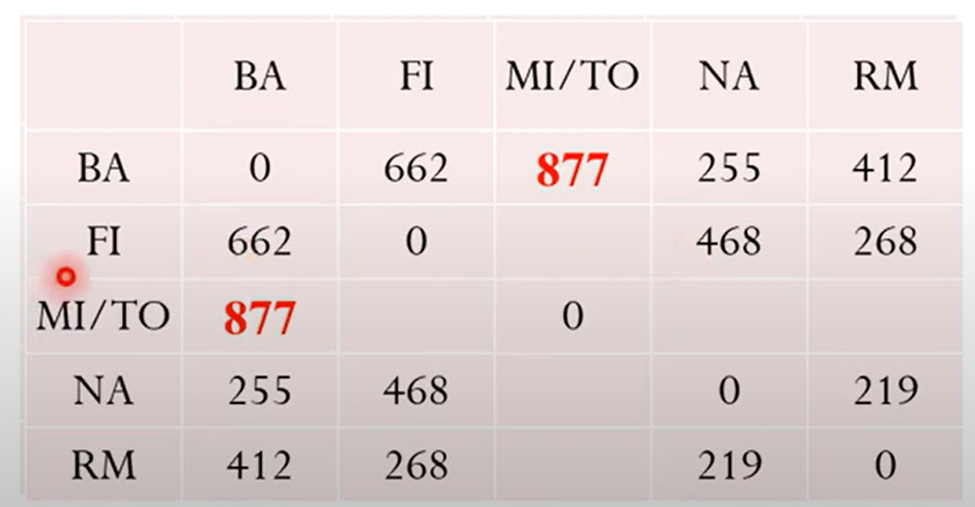

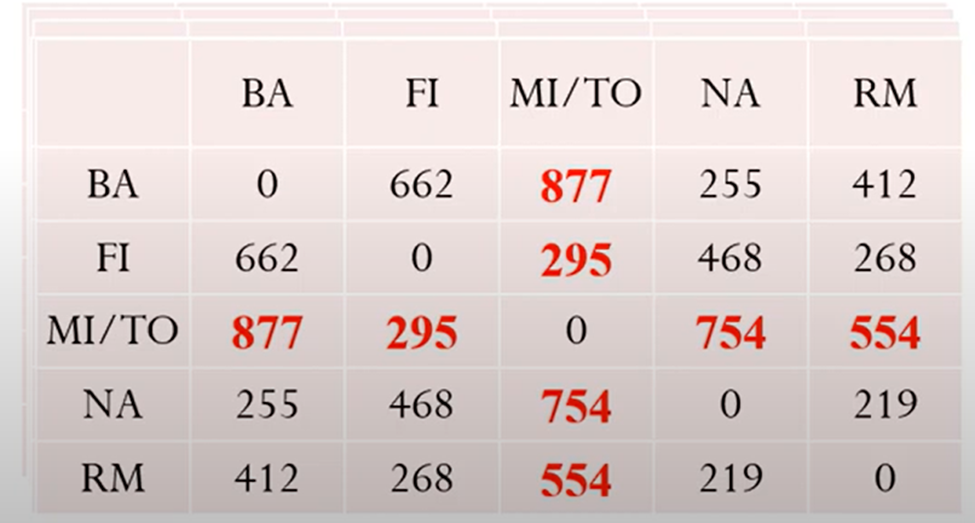

**drawing the dendogram:**

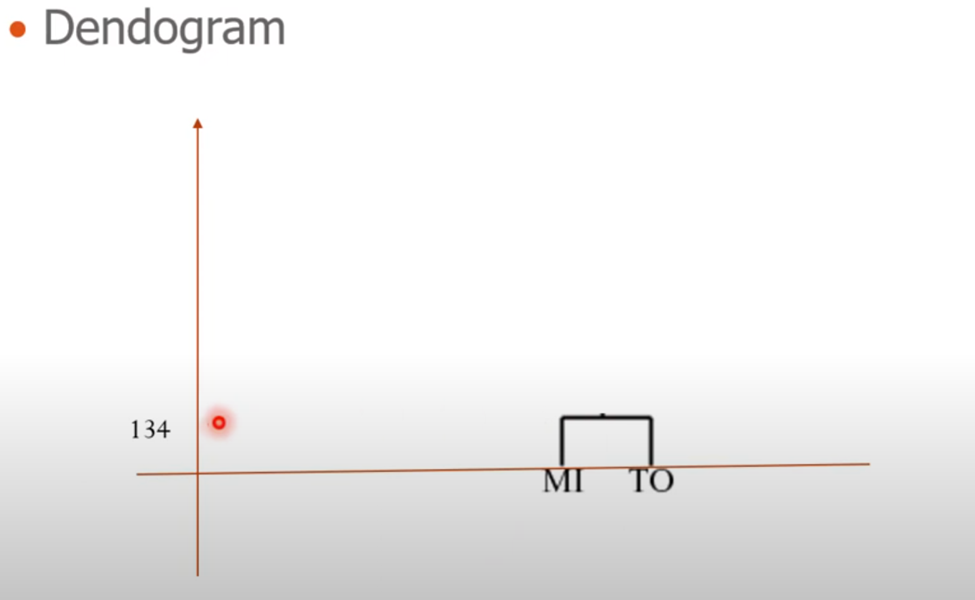

**finding next cluster:**

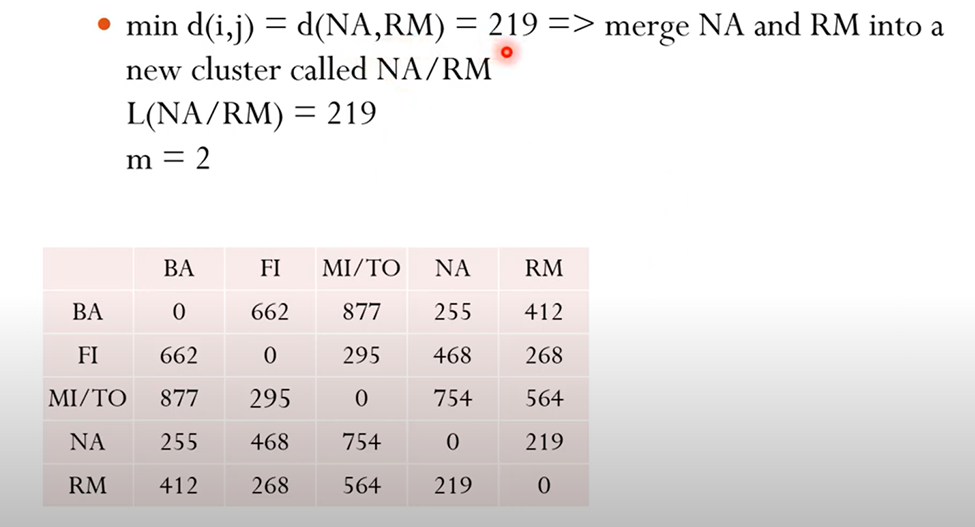

**Updating the matrix**

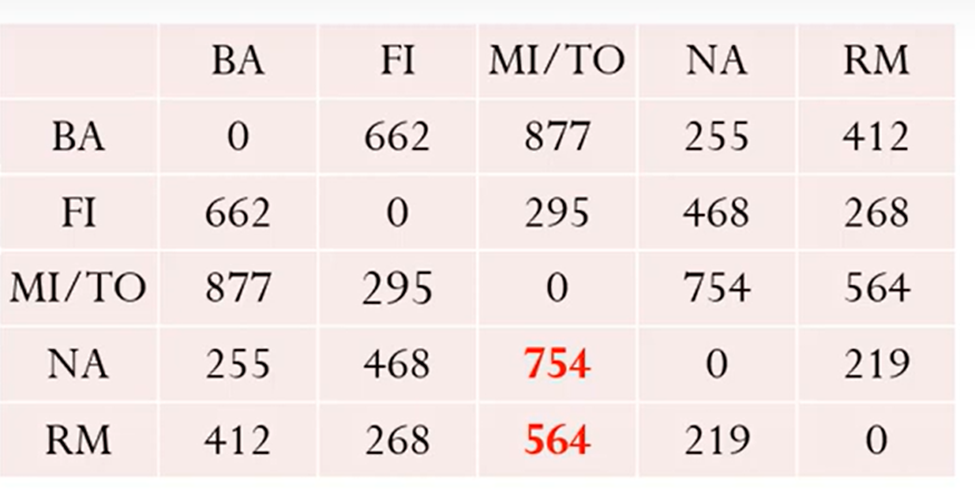

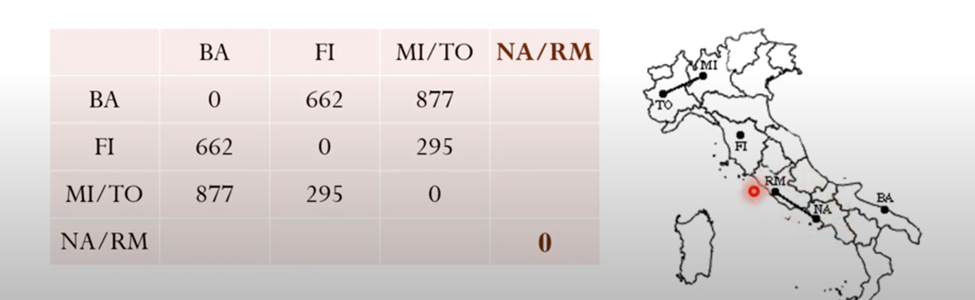

**drawing the Dendogram:**

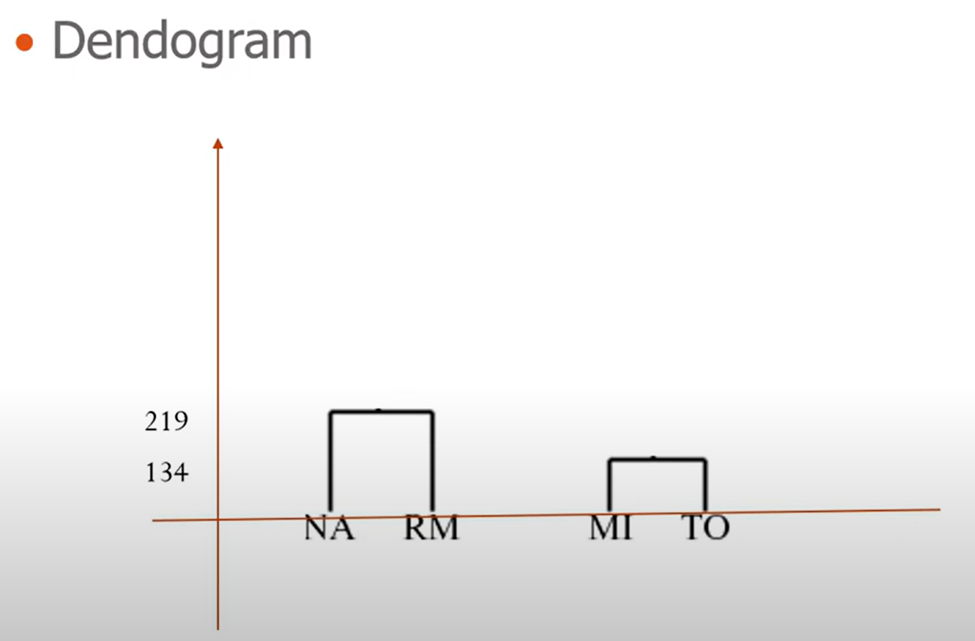

**continue to reach one cluster:**

final dendogram:



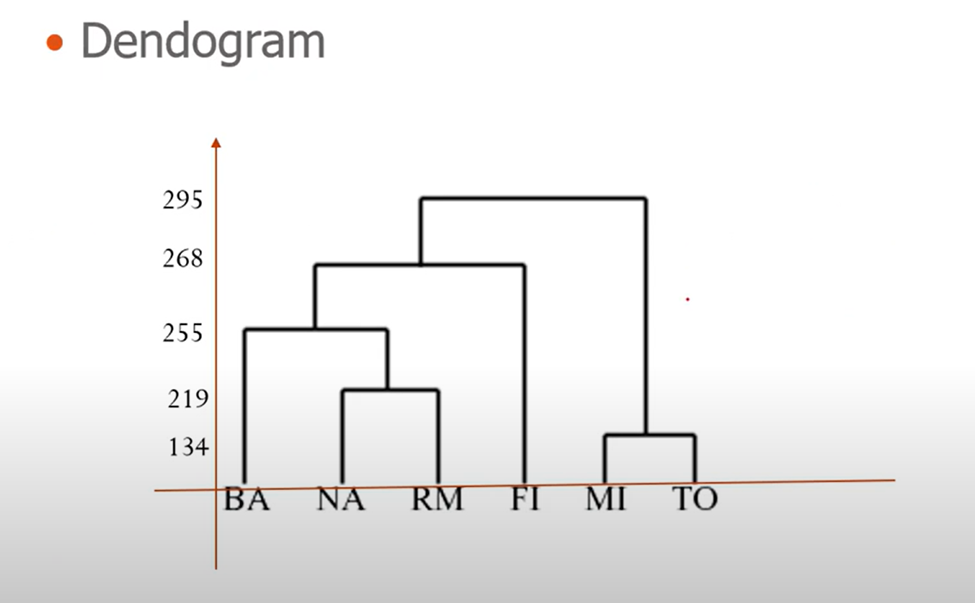

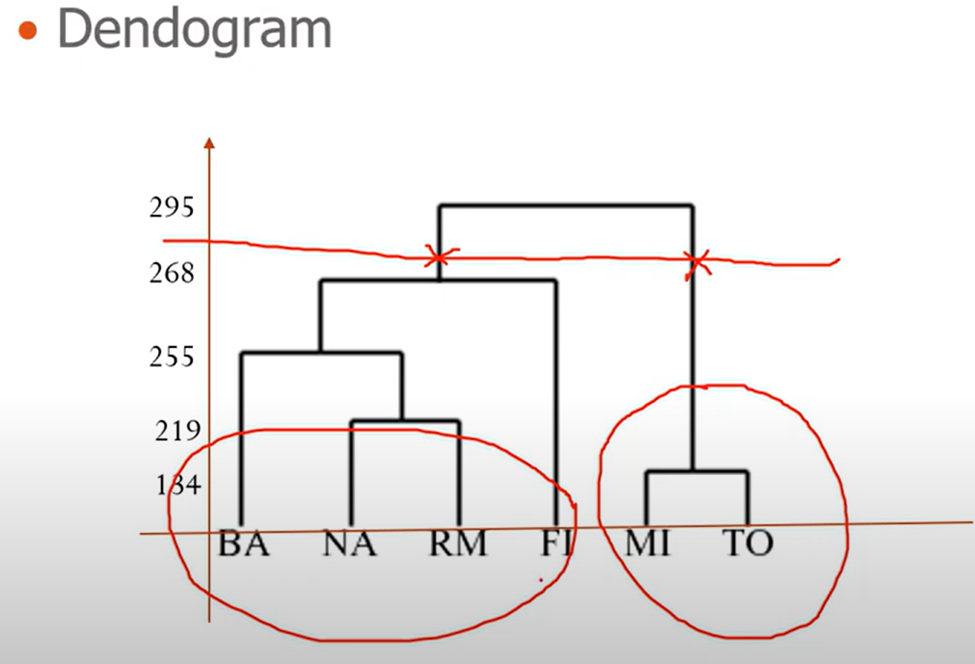

# DBSCAN

DBSCAN, or Density-Based Spatial Clustering of Applications with Noise, is a clustering algorithm that groups points together based on the density of their neighborhoods.



```
#  mathematical
```



>Core Points:

A point is a core point if at least a minimum number of points (MinPts) are within a given distance (ε, epsilon) from it.
>Border Points:

A point is a border point if it’s not a core point but  in the neighborhood of a core point.
>Noise Points:

A point is a noise point if it’s neither a core point nor a border point.



> **algorithm**


First, all the points within epsilon radius are found and the core points are identified with number of points greater than or equal to minPoints.

Next, for each core point, if not assigned to a particular cluster, a new cluster is created for it.

All the densely connected points related to the core point are found and assigned to the same cluster. Two points are called densely connected points if they have a neighbor point that has both the points within epsilon distance.

Then all the points in the data are iterated, and the points that do not belong to any cluster are marked as noise.

***`Example:`***

our dataset:

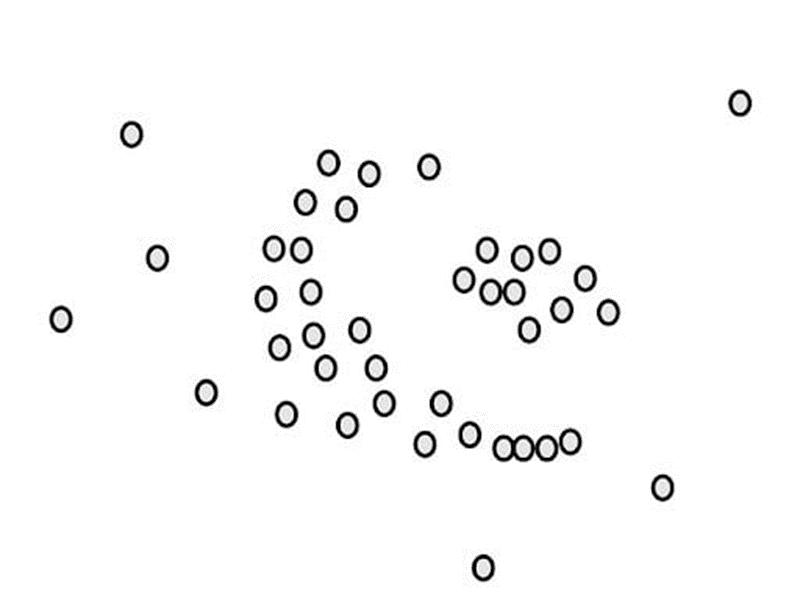

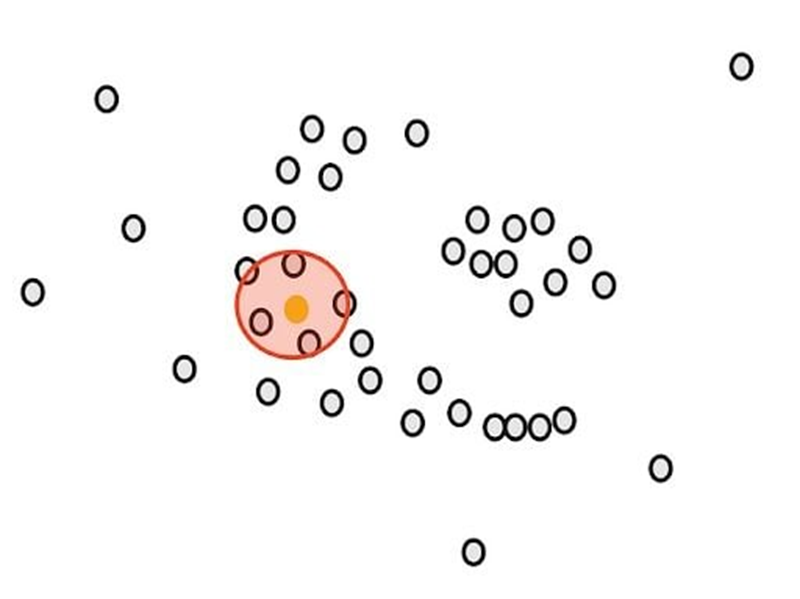

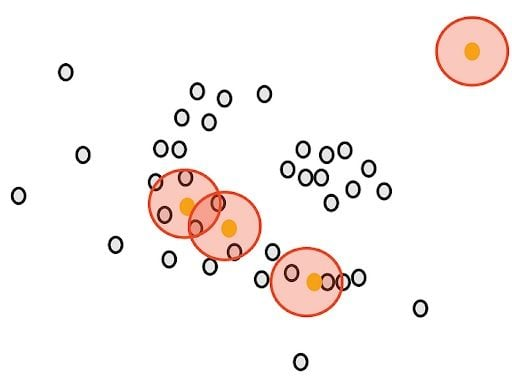

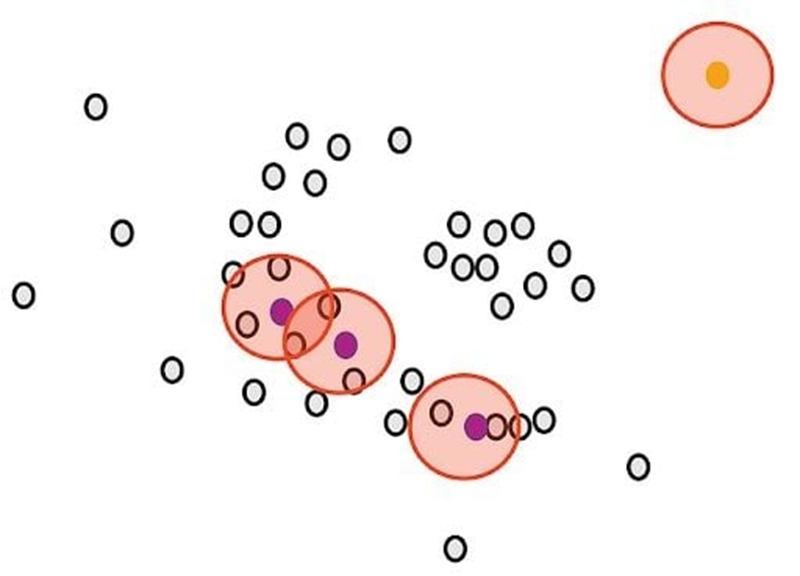

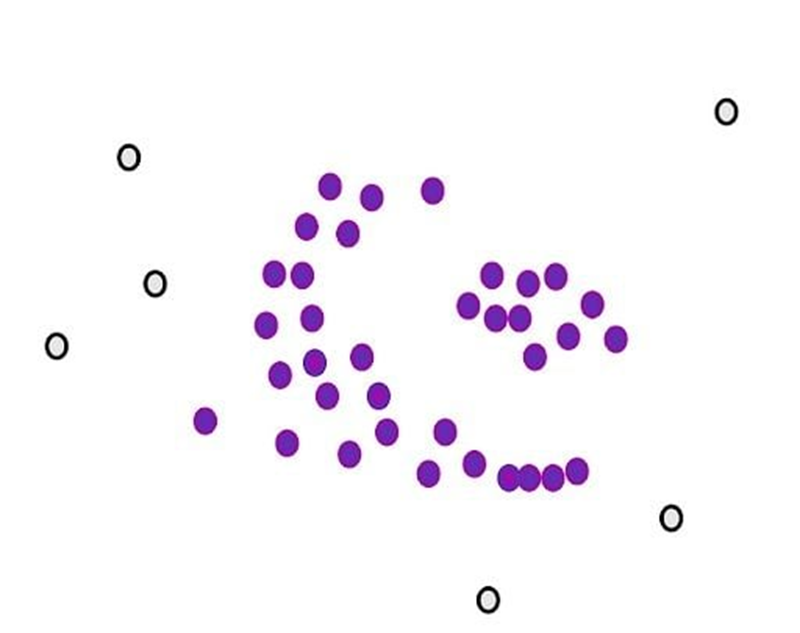

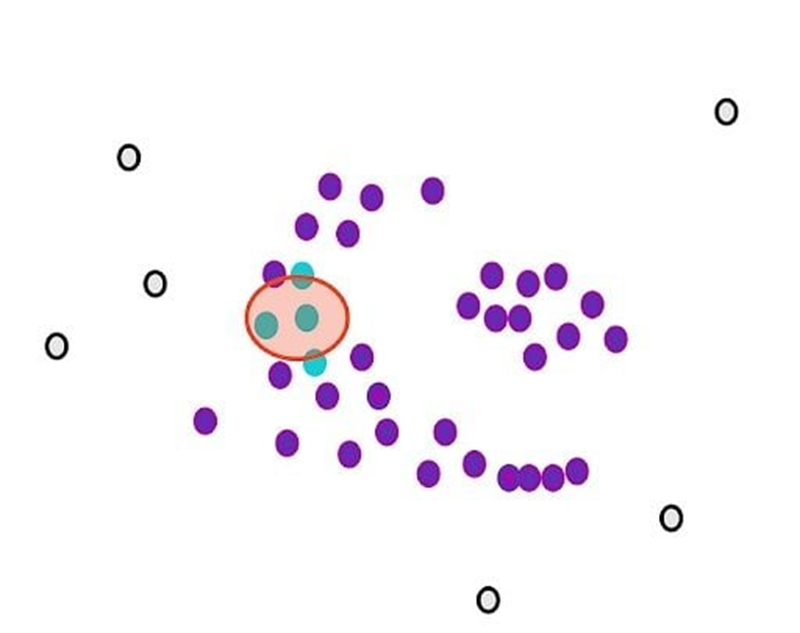

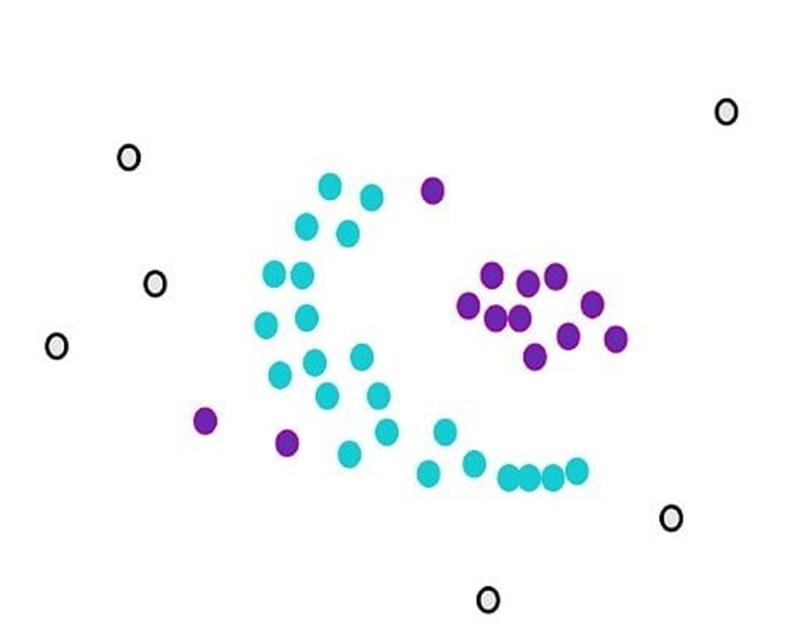

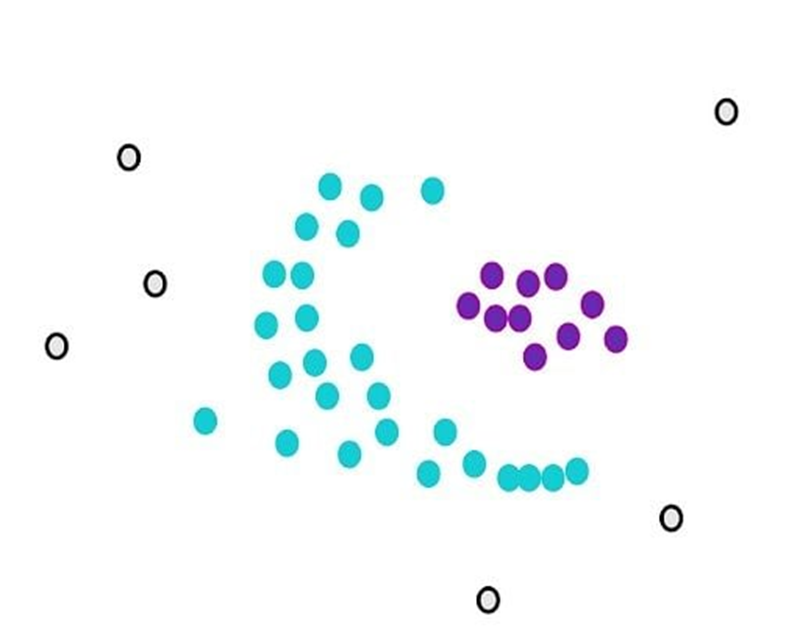

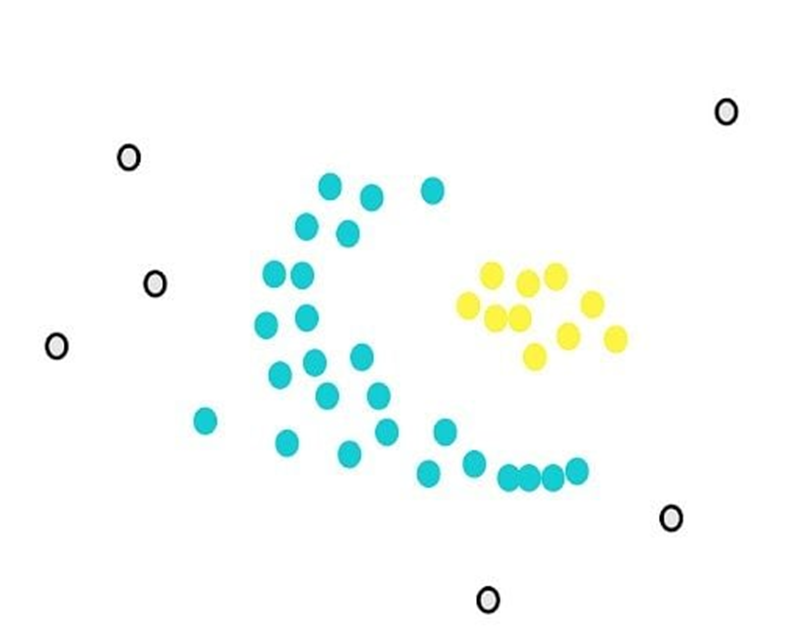

> # Part B : Codes

In [17]:
import tensorflow as tf
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


In [2]:
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/AI DataSet/Dataset- Project 2/UnSup-Data-2024.xlsx'


Mounted at /content/drive


In [18]:

df = pd.read_excel(dataset_path)

# Select relevant features for clustering
features = ['AGE', 'INCCL', 'RISK', ]
X = df[features]

# Handling missing values if any
X.fillna(0, inplace=True)

# Standardize the features
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

<ipython-input-18-f80848fc9753>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [21]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
# Compare the performance using silhouette score
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
hierarchical_score = silhouette_score(X_scaled, hierarchical_labels)
dbscan_score = silhouette_score(X_scaled, dbscan_labels)

print(f'K-Means Silhouette Score: {kmeans_score}')
print(f'Hierarchical Silhouette Score: {hierarchical_score}')
print(f'DBSCAN Silhouette Score: {dbscan_score}')

# The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters.
# The silhouette scores range from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.


K-Means Silhouette Score: 0.31499514390364586
Hierarchical Silhouette Score: 0.24778884567208423
DBSCAN Silhouette Score: 0.9830997373298915


`Calinski-Harabasz Score:` Measures the separation between clusters.


`Davies-Bouldin Score:` Measures the compactness and separation of clusters.


`Silhouette Score:` Measures overall cluster quality.

In [23]:
kmeans_calinski_harabasz = calinski_harabasz_score(X_scaled, kmeans_labels)
hierarchical_calinski_harabasz = calinski_harabasz_score(X_scaled, hierarchical_labels)
dbscan_calinski_harabasz = calinski_harabasz_score(X_scaled, dbscan_labels)

kmeans_davies_bouldin = davies_bouldin_score(X_scaled, kmeans_labels)
hierarchical_davies_bouldin = davies_bouldin_score(X_scaled, hierarchical_labels)
dbscan_davies_bouldin = davies_bouldin_score(X_scaled, dbscan_labels)


print("K-Means - Calinski-Harabasz Score:", kmeans_calinski_harabasz)
print("Hierarchical Clustering - Calinski-Harabasz Score:", hierarchical_calinski_harabasz)
print("DBSCAN - Calinski-Harabasz Score:", dbscan_calinski_harabasz)

print("\n\nK-Means - Davies-Bouldin Score:", kmeans_davies_bouldin)
print("Hierarchical Clustering - Davies-Bouldin Score:", hierarchical_davies_bouldin)
print("DBSCAN - Davies-Bouldin Score:", dbscan_davies_bouldin)

K-Means - Calinski-Harabasz Score: 1840.0773812062578
Hierarchical Clustering - Calinski-Harabasz Score: 1348.3281460091741
DBSCAN - Calinski-Harabasz Score: 5926.084820326124


K-Means - Davies-Bouldin Score: 1.107485285472109
Hierarchical Clustering - Davies-Bouldin Score: 1.2963354238947116
DBSCAN - Davies-Bouldin Score: 0.588948144705164


Plot the HierArchical

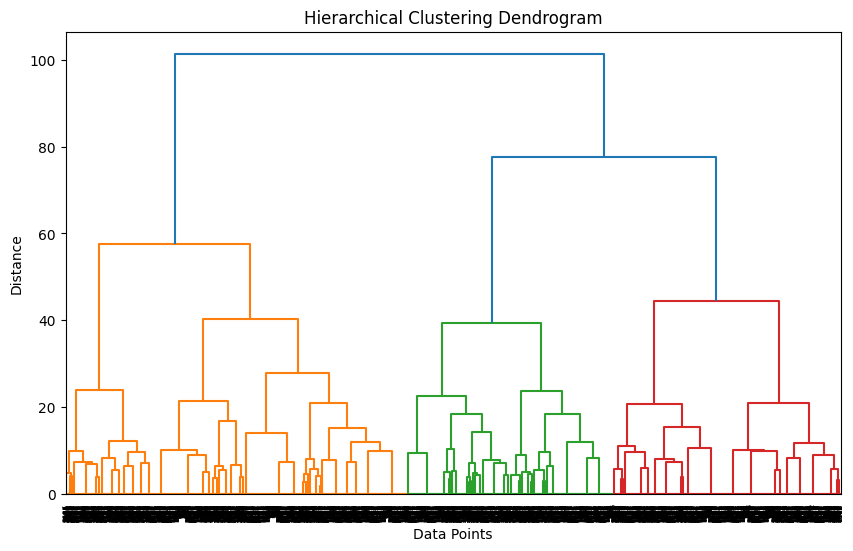

In [24]:
linkage_data = linkage(X, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_data)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

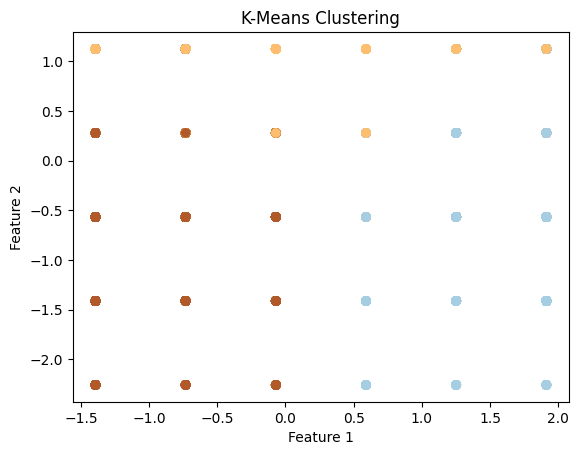

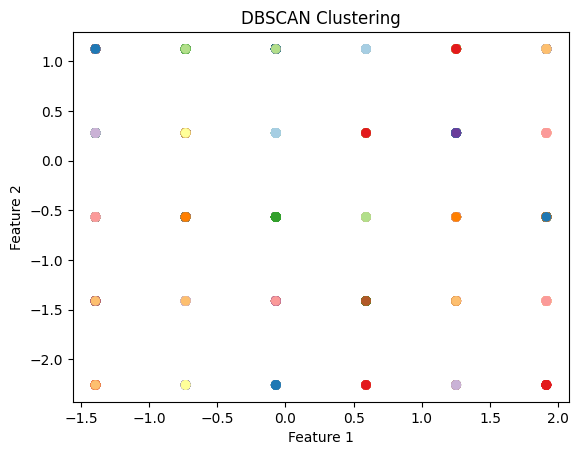

In [25]:
# Plot K-Means clusters
plt.scatter(X_scaled[:, 0], X_scaled[:,  1], c=kmeans_labels, cmap='Paired')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plot DBSCAN clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='Paired')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



> # Part II - Section A:




**Gini Impurity Index:**

Gini impurity is a measure used in decision tree algorithms to quantify a dataset's impurity level. It ranges from 0 to 0.5, where 0 indicates a perfectly pure node (all instances belong to the same class), and 0.5 signifies maximum impurity (an equal distribution of classes). In decision trees, it aids in selecting the optimal split by identifying features that result in more homogeneous subsets of data, ultimately contributing to the creation of accurate and reliable predictive models.

Gini Impurity is calculated as:

$G(t) = 1 - \sum\limits_{i = 1}^c {{p_i}^2}$

where G(t) is the Gini impurity at node t and ${p_i}$ is the proportion of observations of class c at node t.

>Our dataset:




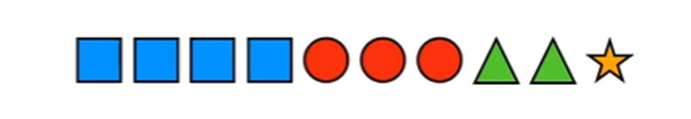



> Create a matrix

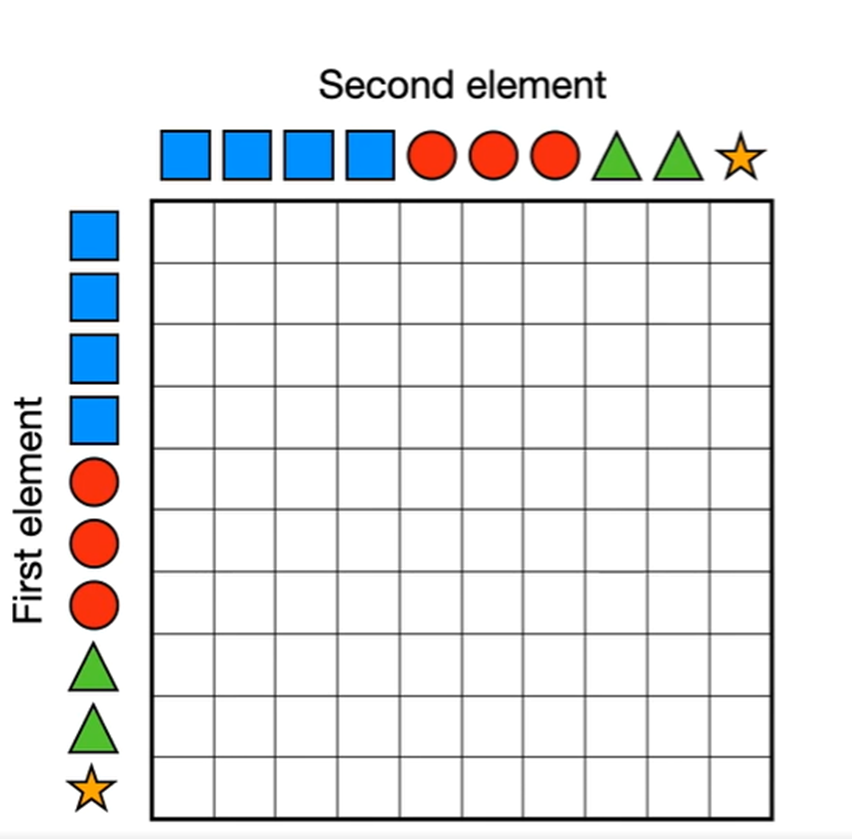

> calculate GINI ▶
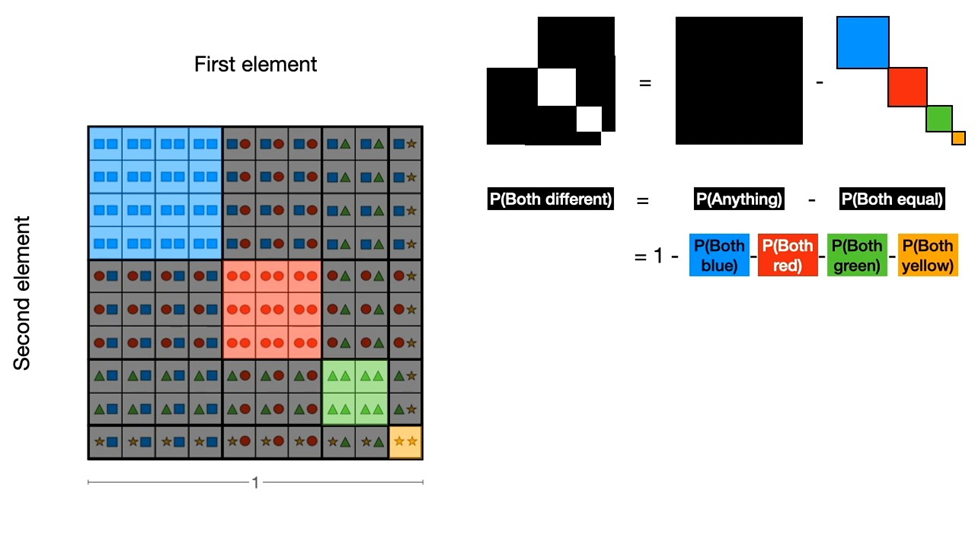

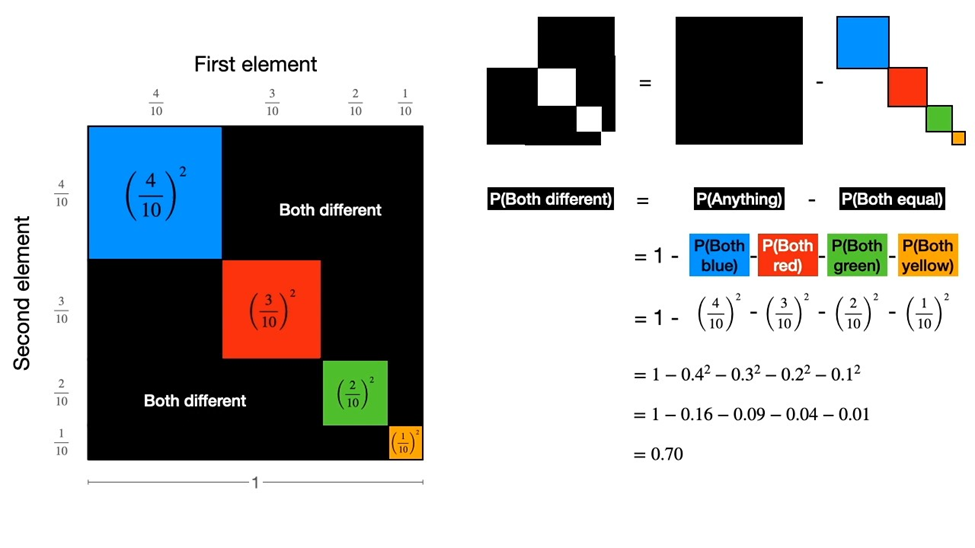

> **General formula**

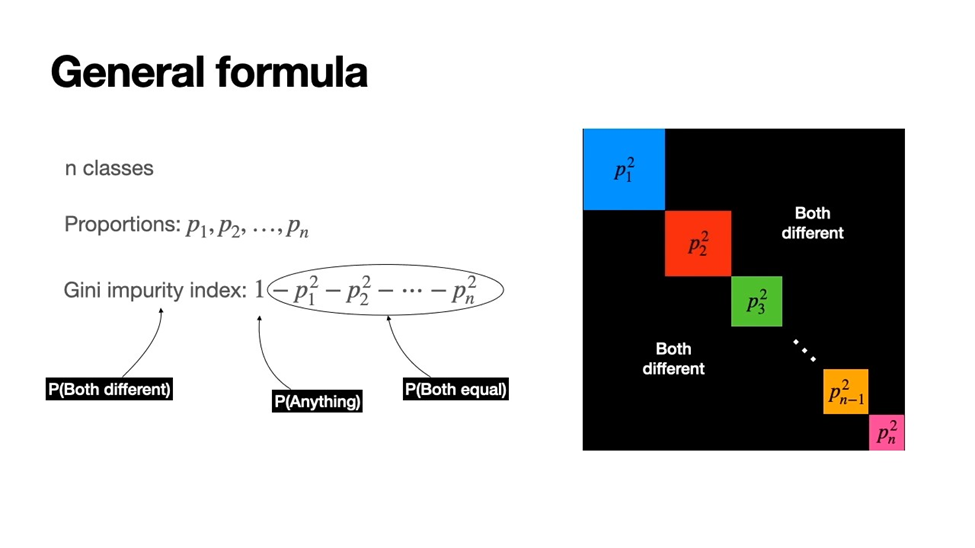


Calculate Weighted Gini Impurity for Each Split:
For each split point (based on an attribute), calculate the weighted sum of Gini impurities of the resulting child nodes.
Weighted Gini Impurity(G{split}) =
>${N_{left}}/{N}\times G(left)+\frac{N_{right}}{N} * G(right)$

, where Nleft​ and Nright​ are the number of data points in the left and right child nodes, respectively, and N is the total number of data points.





***`Code:`***

**Make a sample data set with 2 features and 2 classes**


In [26]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic data
X, y = make_classification(n_samples=10, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Scale features to the range [1, 100] (natural numbers)
scaler = MinMaxScaler(feature_range=(1, 100))
X_scaled = scaler.fit_transform(X)

# Create a DataFrame
df = pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2'])
df['Target'] = y

# Display the first few rows
print(df)

     Feature1    Feature2  Target
0   82.835774   26.113526       1
1   37.237695   29.405046       0
2    1.000000  100.000000       0
3   45.900417   26.351235       0
4   20.252980   25.557475       0
5   41.408425   36.820035       1
6   96.439922   20.704093       1
7   97.474444   88.334198       1
8  100.000000   71.356959       1
9   48.654686    1.000000       0


**Plot the output decision tree**

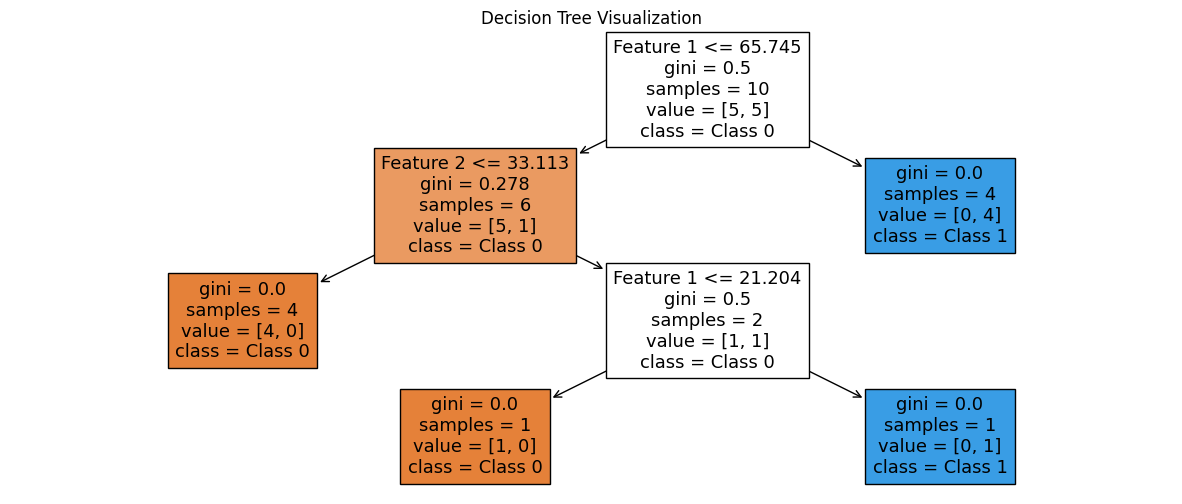

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a decision tree classifier
tree_classifier = DecisionTreeClassifier(criterion='gini')
tree_classifier.fit(X_scaled, y)

# Plot the decision tree
plt.figure(figsize=(15, 6))
plot_tree(tree_classifier, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title("Decision Tree Visualization")
plt.show()

> # Part II - Section B:

> **Importing necessary libraries**

In [44]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


> make classification and create our dataset using not equal weights

In [45]:


X, y = make_classification(n_samples=100, n_features=3, n_informative=3, n_redundant=0, n_classes=3, weights= [0.61,0.24] , random_state=20)


> Build our trees

In [47]:

# Build a decision tree using entropy
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_entropy.fit(X, y)

# Build a decision tree using Gini impurity
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_gini.fit(X, y)

DecisionTreeClassifier(random_state=42)

> Ploting The result

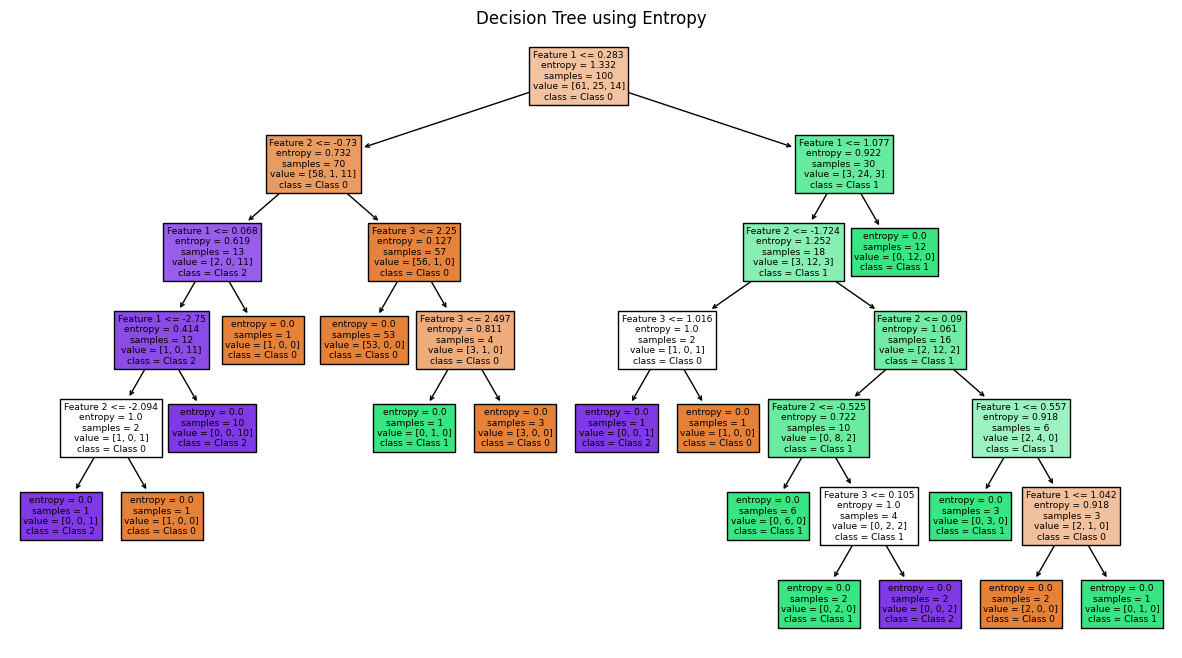

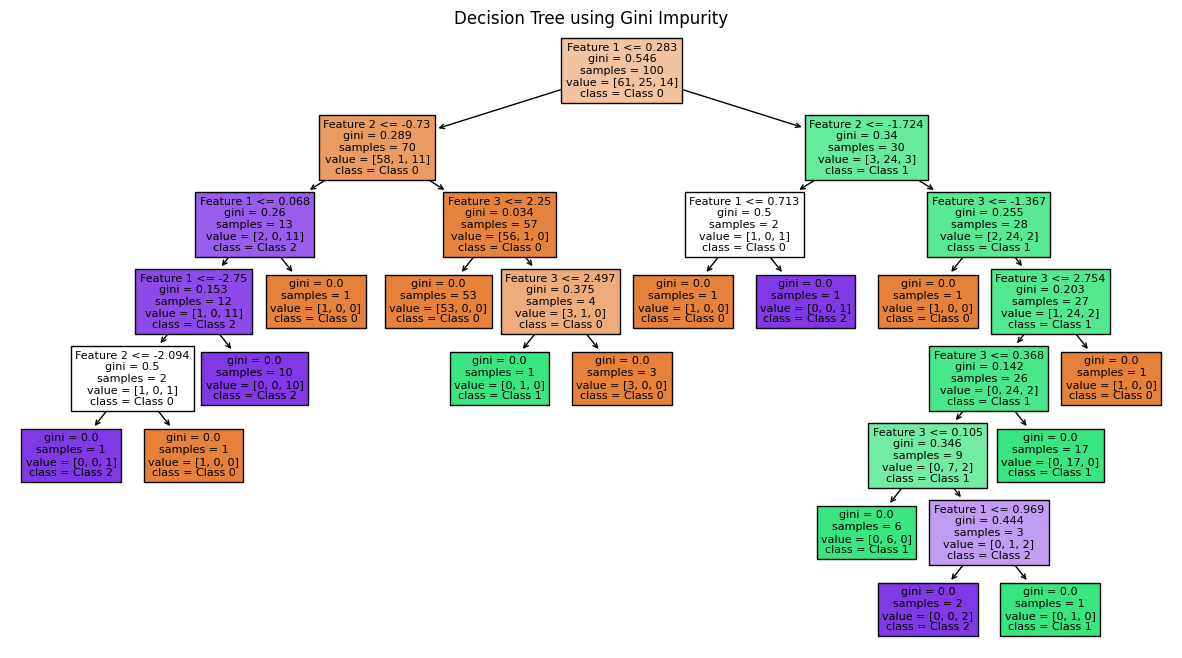

In [48]:


# Plot the decision tree using entropy
plt.figure(figsize=(15, 8))
plot_tree(tree_entropy, filled=True, feature_names=['Feature 1', 'Feature 2', 'Feature 3'], class_names=['Class 0', 'Class 1', 'Class 2'])
plt.title('Decision Tree using Entropy')

# Plot the decision tree using Gini impurity
plt.figure(figsize=(15, 8))
plot_tree(tree_gini, filled=True, feature_names=['Feature 1', 'Feature 2', 'Feature 3'], class_names=['Class 0', 'Class 1', 'Class 2'])
plt.title('Decision Tree using Gini Impurity')
plt.show()

> # **Part II - Section C:**

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/AI DataSet/Assignment 1-Dataset/Assignment 1-Dataset.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> **Load and Preprocess on dataset**

In [52]:

df = pd.read_csv(dataset_path)

yTrain = df['Target']

#Get the number of classes and the number of samples belonging to each one
classCount = yTrain.value_counts()
print(classCount)

#Preprocessing the data
df = df.drop(["Target","Unnamed: 93","Unnamed: 94"] , axis=1)
scaler = StandardScaler()
scaler.fit(df)
standard_x = scaler.transform(df)

xTrain = pd.DataFrame(standard_x , columns=df.columns)
xTrain , xTest , yTrain , yTest = train_test_split(xTrain, yTrain, test_size=0.1, random_state=12)

Target
0    57213
2    36250
1    17841
Name: count, dtype: int64


> **Building the decision tree and random forest model**

In [55]:
# Build and train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(xTrain, yTrain)

# Build and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(xTrain, yTrain)

RandomForestClassifier(random_state=42)

> **Training the models**

In [56]:
# Make predictions using Decision Tree
dt_predictions = dt_model.predict(xTest)

# Make predictions using Random Forest
rf_predictions = rf_model.predict(xTest)


> report the result


In [59]:
# Compute classification report for Decision Tree
dt_report = classification_report(yTest, dt_predictions)
print("Decision Tree Classification Report:")
print(dt_report)

# Compute classification report for Random Forest
rf_report = classification_report(yTest, rf_predictions)
print("\nRandom Forest Classification Report:")
print(rf_report)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70      5755
           1       0.60      0.62      0.61      1721
           2       0.63      0.63      0.63      3655

    accuracy                           0.67     11131
   macro avg       0.65      0.65      0.65     11131
weighted avg       0.67      0.67      0.67     11131


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      5755
           1       0.67      0.66      0.66      1721
           2       0.68      0.63      0.65      3655

    accuracy                           0.70     11131
   macro avg       0.69      0.68      0.69     11131
weighted avg       0.70      0.70      0.70     11131



> # **Part II - Section D:**

**Summary of Decision Tree Regression:**

- **Introduction**: Decision tree regression predicts continuous numerical values using a tree-like model. Unlike classification, it focuses on numeric outcomes.
- **Working of the Algorithm**:
    - **Building the Tree**: Start with a root node representing the entire dataset.
    - **Splitting the Data**: Analyze features to divide data into groups based on target values.
    - **Recursive Splitting**: Create child nodes, recursively splitting data based on best features and conditions.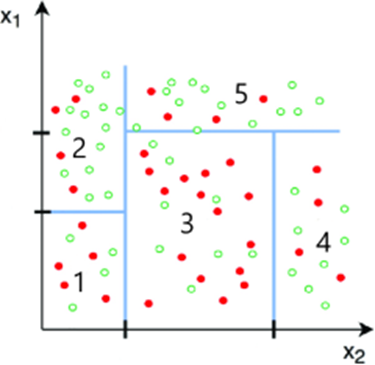

    - **Stopping Criterion**: Stop when a depth limit or minimum data points in a leaf node is reached.
    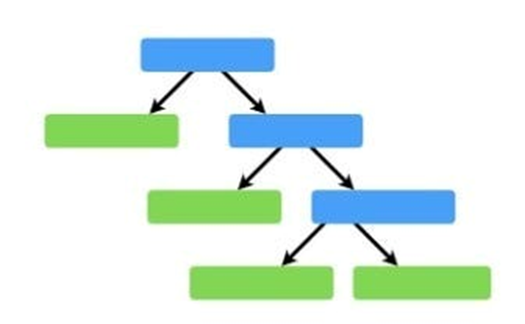

    - **Making Predictions**: Traverse tree based on feature values to predict outcomes.
    - **Final Prediction**: Leaf nodes contain predicted values based on subgroups' averages¹².

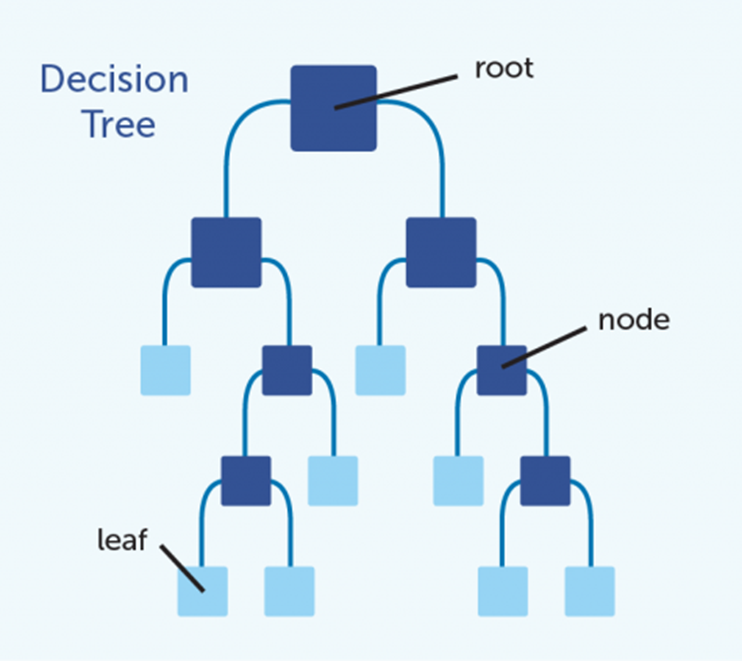

**Codes:**

> **Loading the dataset**

In [1]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target

> Split the dataset:



In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> build the models:

In [3]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)

In [4]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

> train the models:


In [5]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [6]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

> Showing the results:

In [7]:
dt_score = dt_model.score(X_test, y_test)
rf_score = rf_model.score(X_test, y_test)

print("Decision Tree Model Score: {:.2f}".format(dt_score))
print("Random Forest Model Score: {:.2f}".format(rf_score))

Decision Tree Model Score: 0.86
Random Forest Model Score: 0.89
